# AML Lab Sessional 1 Jupyter Notebook

### 1. VS Code is a MUST
1. You should code in VS Code. Google Colab not allowed

### 2. Pre-requisites for lab in VS Code
1. Install PDF export support https://saturncloud.io/blog/how-to-export-jupyter-notebook-by-vscode-in-pdf-format/

### 3. At the end, export your notebook as html and ipynb 
1. Open VS Code command palette Shift + Ctrl + P
2. Type "Export Jupyter Notebook" in the search bar and select "Export Jupyter Notebook to html"
3. Upload your html AND ipynb here: https://tinyurl.com/y9ptbej2 (In the prompt, put your name correctly else your submission will be rejected)

### 4. Lab Sessional Summary 
1. A code template is given to you in lab sesional in this jupyter notebook
2. The template will follow a linear sequence of TODOs appropriately labelled with question marks
3. You will have to fill the TODO question marks to compile those notebook cells and proceed to next cells
4. You can think of the linear sequence of TODOs as a guided thought process.
5. Sessional is open book. Google, github, browse product documentation ChatGPT - Do anything you want, except copying others. No discussing among yourselves (Sending questions to your seniors and seeking answers is prohibited). If you are caught carrying out these illegal activities, you will be reported for immediate action. 
6. You CANNOT replace the TODO code template with some other code copied from stack overflow, ChatGPT etc. All your browsing and search should give you insights into finally how you can fit that into the framework I provide for the thought process of solving the problem. You will have to mandatorily fill the question marks and proceed with the lab problem.

In [38]:
import numpy as np
import pandas as pd
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [39]:
sk.__version__

'1.2.2'

### Problem Definition

You are provided with diabetes dataset. Your task is:

1. Part 1: To perform EDA and prediction without pipeline
2. Part 2: To move EDA and kNN prediction into a pipeline
3. Part 3: To combine the pipeline and gridsearch to get best K and weights hyperparameters
4. Part 4: Save the model as json file, load & use it to do prediction. This part is optional and will be used to accumulate bonus points as a buffer for the semester lab exam if there is any shortfall

# Part 1 - Perform EDA and prediction without pipeline

In [3]:
# TODO: 1 Load the csv file
df = pd.read_csv('d2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
# TODO: 2 Display information about dataframe
df.info(verbose=True, show_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
# TODO: 3 Check if there are nulls and display their total for each feature
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# TODO: 4 Check for duplicates
dupsSeries = df.duplicated() # Should return a pandas Series with True False for every row

# Print the number of duplicates
print(f"Number of duplicates = {dupsSeries.sum()}")

Number of duplicates = 1256


In [7]:
# TODO: 5 Drop duplicates inplace
df.drop_duplicates(inplace=True)

In [9]:
# TODO: 6 Display how many rows exist in dataframe after dropping duplicates
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1568
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               744 non-null    int64  
 1   Glucose                   744 non-null    int64  
 2   BloodPressure             744 non-null    int64  
 3   SkinThickness             744 non-null    int64  
 4   Insulin                   744 non-null    int64  
 5   BMI                       744 non-null    float64
 6   DiabetesPedigreeFunction  744 non-null    float64
 7   Age                       744 non-null    int64  
 8   Outcome                   744 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.1 KB


In [11]:
# TODO: 7 Identify candidate features for encoding by seeing how many distinct values are present in every column 
df.nunique() 

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     182
BMI                         247
DiabetesPedigreeFunction    505
Age                          52
Outcome                       2
dtype: int64

In [13]:
# TODO: 8
# Display all possible values that the column named "Pregnancies" has in this dataframe
df["Pregnancies"].unique()

# Based on different possible values of Pregnancies, would you choose this feature to be encoded?
# State your reason as 1 sentence comment here
# Answer : It is preferred to be encoded as all the values are integres, and have finite number of values that can appear for all possible records

array([ 2,  0,  1,  4,  8,  3,  6,  5,  7, 10, 12,  9, 11, 13, 15, 17, 14],
      dtype=int64)

In [14]:
# TODO: 9 Find if this is an dataset is imbalanced wrt target variable classes
zeroClassCount = df[df["Outcome"] == 0]["Outcome"].count()
zeroClassCount/df.count()

Pregnancies                 0.659946
Glucose                     0.659946
BloodPressure               0.659946
SkinThickness               0.659946
Insulin                     0.659946
BMI                         0.659946
DiabetesPedigreeFunction    0.659946
Age                         0.659946
Outcome                     0.659946
dtype: float64

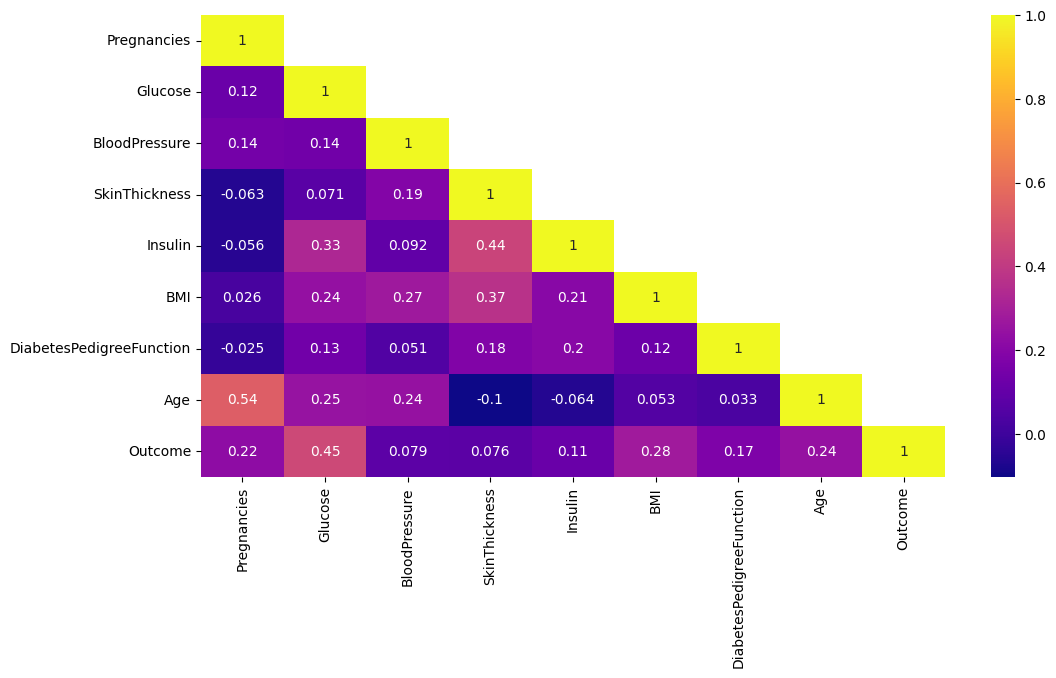

In [16]:
# TODO: 10 Run this cell to display correlation matrix heat map
# Would you consider dropping any feature based on their correlation? 
# Type your answers here: No, we do not prefer to drop any of the columns
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='plasma',fmt='.2g',annot=True,mask=np.triu(df.corr(),+1))
plt.show()

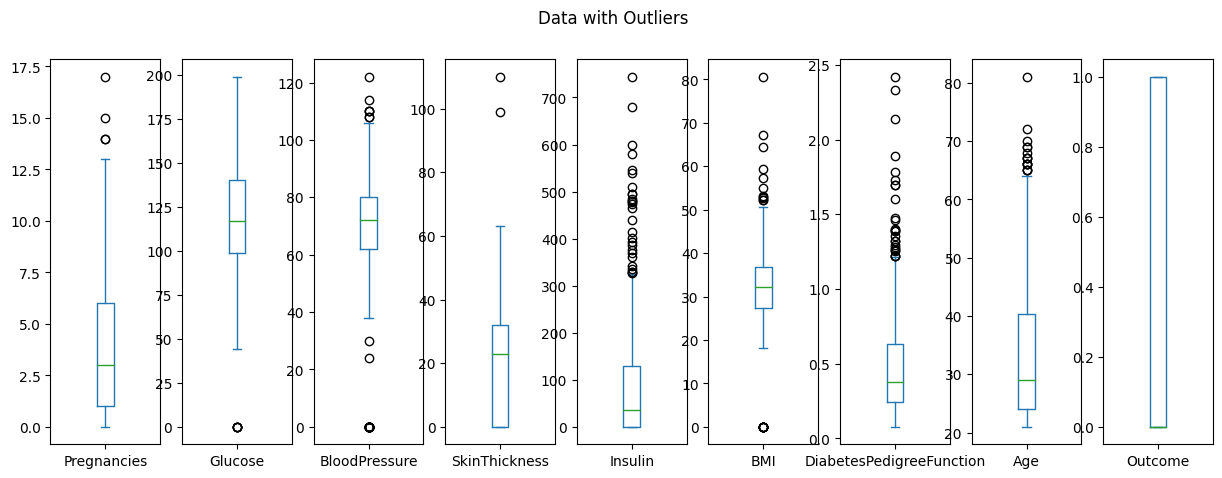

In [17]:
# TODO: 11 Run this cell to see box plots.
# Visually examine the box plot and answer this question
# How do you identify the 1.5 IQR boundary? 
# Which two features have most outliers beyond 1.5 IQR?
# (Increase the figure size if you want to see larger image)
# Put your answer for both questions here
# The boundary above 1.5 IQR boaundary is basically the beyond Q3 range, where outliers lie.
# Two features having most outliers beyond 1.5 IQR are Insulin and DiabetesPedigreeFunction.

df.plot(kind="box",subplots=True,figsize=(15,5),title="Data with Outliers");

In [ ]:
# TODO: 12 Did you see any nulls in the dataset? 
# Ans: No, no nulls present in the dataset

In [18]:
# But look at how many features have zeros in them
# Display zeroes in each column as percentage
for col in df.columns:
    count = (df[col] == 0).sum()
    percentage = (count * 100)/df.shape[0]
    print(f'Count of zeros in Column {col} : {count}, percentage 0s: {percentage:.2f}%')

Count of zeros in Column Pregnancies : 112, percentage 0s: 15.05%
Count of zeros in Column Glucose : 5, percentage 0s: 0.67%
Count of zeros in Column BloodPressure : 34, percentage 0s: 4.57%
Count of zeros in Column SkinThickness : 215, percentage 0s: 28.90%
Count of zeros in Column Insulin : 359, percentage 0s: 48.25%
Count of zeros in Column BMI : 10, percentage 0s: 1.34%
Count of zeros in Column DiabetesPedigreeFunction : 0, percentage 0s: 0.00%
Count of zeros in Column Age : 0, percentage 0s: 0.00%
Count of zeros in Column Outcome : 491, percentage 0s: 65.99%


1. After executing the above cell, you found many cells contain 0.
2. Some cells should never contain 0. For e.g. Glucose
3. Identify the cells that should never contain 0 and replace those 0 with Nan

In [19]:
# TODO: 13 Replace 0 with Nan for features that should never contain 0
# Choose 5 columns you want to replace 0 with Nan
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = \
    df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [20]:
# TODO: 14  Now do null check again to ensure the right featues have Nans. Otherwise go back and fix

df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                34
SkinThickness               215
Insulin                     359
BMI                          10
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [21]:
y = df.pop("Outcome") #Setup target variable
type(y)

pandas.core.series.Series

In [22]:
# TODO: 15

# Answer these questions with short one liner right in this cell as a comment
#
# 1. What does the pop operation do?
# Pops the final most feature series of the dataframe, which here is the Outcome.
#
# 2. Is pop() idempotent or non-idempotent operation?
# Given that every time a pop() operation is applied, the dataframe considered is the same, it is idempotent.
#
# 3. How do you check if an operation is idempotent/non-idempotent?
# Here, by considering the same dataframe as initialized and subject it to operation multiple times, where the dataframe is re-initialized for every operation.
#

In [23]:
X = df # Setup independent variables

In [84]:
from sklearn.model_selection import train_test_split

# Fill this out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [60]:
# TODO: 16 Answer these questions
# 1. Did you use stratify?
# No, stratified not used
#
# 2. If yes, on which column and why? If not, why not?
# Because it s not an imbalanced dataset
#

In [85]:
# TODO: 17 Display all records that have at least one Nan column value
# If you cannot get this, you can leave this cell execution and proceed
# Subsequent cells do not depend on this. If you cannot solve this, you can proceed to next cell

X_train.loc[:, :].isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
691,False,False,False,True,True,False,False,False
599,False,False,False,False,False,False,False,False
294,False,False,False,True,True,False,False,False
77,False,False,False,False,True,False,False,False
352,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...
740,False,False,False,False,False,False,False,False
192,False,False,False,True,True,False,False,False
662,False,False,False,False,False,False,False,False
592,False,False,False,True,True,False,False,False


##### Deciding on Imputation
1. Now you should decide which imputation to use - whether SimpleImputer or IterativeImputer
2. Instead of following MCAR/MAR path to decide on SimpleImputer or IterativeImputer, you will take a simple alternative
3. Use IterativeImputer if a large number of rows have Nan for a column
4. Use SimpleImputer if the number of Nans is very small 

In [86]:
print(f"X_train.shape={X_train.shape}")
X_train.isna().sum()

X_train.shape=(558, 8)


Pregnancies                   0
Glucose                       4
BloodPressure                23
SkinThickness               151
Insulin                     267
BMI                           7
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [87]:
# TODO 18 Based on the results of previous cell which columns will you apply SimpleImputer ?
# Select only those columns here 

X_train_mean_impute = X_train.loc[:,['Glucose','BloodPressure','BMI']]
X_train_mean_impute

,Glucose,BloodPressure,BMI
691,158.0,114.0,42.3
599,109.0,38.0,23.1
294,161.0,50.0,21.9
77,95.0,72.0,37.7
352,61.0,82.0,34.4
...,...,...,...
740,120.0,80.0,42.3
192,159.0,66.0,30.4
662,167.0,106.0,37.6
592,132.0,80.0,34.4


In [88]:
# TODO: 19 Apply SimpleImputer to appropriate columns only

from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
#Fill code above to create SimpleImputer 

X_train_mean_imputed = mean_imputer.fit_transform(X_train_mean_impute)

# Display first few
X_train_mean_imputed[0:5,:]

array([[158. , 114. ,  42.3],
       [109. ,  38. ,  23.1],
       [161. ,  50. ,  21.9],
       [ 95. ,  72. ,  37.7],
       [ 61. ,  82. ,  34.4]])

In [89]:
# TODO: 20 Which columns will you apply IterativeImputer ?
# Name those columns and provide 2 line short reason
# Iterative imputation for SkinThickness and Insulin, as these values are common than the other 3 columns for which the mean was applied.
# The Glucose, Blood Pressure levels and Body mass index can be taken as average values of some people as they are more consistent, than the Insulin and SkinThickness values of a patient.

X_train.loc[:,['SkinThickness','Insulin']]

,SkinThickness,Insulin
691,NaN,NaN
599,18.0,120.0
294,NaN,NaN
77,33.0,NaN
352,28.0,NaN
...,...,...
740,37.0,150.0
192,NaN,NaN
662,46.0,231.0
592,NaN,NaN


Iterative Imputer uses all non null features of the dataset to impute. To apply Iteratative Imputer on the two columns identified above, you should have all other features combined into the dataframe or numpy nmatrix first. 

You should do the following for that
1. Remove the columns of the dataframe that were subjected to mean imputation
2. Convert the remaining dataframe into numpy matrix 
3. Combine the above numpy matrix with mean imputed columns earlier. The "combining" two matrices is achieved by concatenating those two numpy matrices - by using an appropriate numpy stacking function
4. The stacked numpy matrix is then used for iterative imputation

In [90]:
# TODO: 21 Remove the columns of X_train dataframe that were already subjected to mean imputation
# Hold on to the rest as a Numpy matrix
X_train_set_aside = X_train.drop(['Glucose','BloodPressure','BMI'], axis=1).to_numpy()
X_train_set_aside

array([[1.30e+01,      nan,      nan, 2.57e-01, 4.40e+01],
       [1.00e+00, 1.80e+01, 1.20e+02, 4.07e-01, 2.60e+01],
       [0.00e+00,      nan,      nan, 2.54e-01, 6.50e+01],
       ...,
       [8.00e+00, 4.60e+01, 2.31e+02, 1.65e-01, 4.30e+01],
       [3.00e+00,      nan,      nan, 4.02e-01, 4.40e+01],
       [1.00e+01, 1.80e+01,      nan, 5.95e-01, 5.60e+01]])

In [91]:
# TODO: 22 Concatenate the two numpy matrices by using an appropriate numpy stacking function
# Identify which are those two numpy matrices first and use them

X_train = np.hstack((X_train_set_aside, X_train_mean_imputed)) # this numpy matrix will be the new X_train from prediction
X_train

array([[ 13. ,   nan,   nan, ..., 158. , 114. ,  42.3],
       [  1. ,  18. , 120. , ..., 109. ,  38. ,  23.1],
       [  0. ,   nan,   nan, ..., 161. ,  50. ,  21.9],
       ...,
       [  8. ,  46. , 231. , ..., 167. , 106. ,  37.6],
       [  3. ,   nan,   nan, ..., 132. ,  80. ,  34.4],
       [ 10. ,  18. ,   nan, ...,  94. ,  72. ,  23.1]])

In [92]:
# TODO: 23 Perform Iterative Imputation on two columns with Nan data
# At this point only two columns will have Nan - SkinThickness and Insulin
# Those 2 will be imputed using all other columns 
# But to make life easy, this is equivalent to performing Iterative Imputation using all other columns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iter_imputer = IterativeImputer()

X_train_iter_imputed = iter_imputer.fit_transform(X_train)

# Display first few
X_train_iter_imputed[0:5,:]

array([[ 13.        ,  38.71919438, 237.59954872,   0.257     ,
         44.        , 158.        , 114.        ,  42.3       ],
       [  1.        ,  18.        , 120.        ,   0.407     ,
         26.        , 109.        ,  38.        ,  23.1       ],
       [  0.        ,  23.91228991, 226.66981512,   0.254     ,
         65.        , 161.        ,  50.        ,  21.9       ],
       [  5.        ,  33.        , 103.29033047,   0.37      ,
         27.        ,  95.        ,  72.        ,  37.7       ],
       [  3.        ,  28.        ,  26.8078155 ,   0.243     ,
         46.        ,  61.        ,  82.        ,  34.4       ]])

In [93]:
# TODO: 24 Fill the question marks to do z transform

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_iter_imputed)
X_train_scaled

array([[ 2.68061558,  0.97018766,  0.85174053, ...,  1.18954035,
         3.36441269,  1.31215916],
       [-0.80741433, -1.14028757, -0.35994306, ..., -0.42357097,
        -2.78819233, -1.37708204],
       [-1.09808349, -0.53805655,  0.73912633, ...,  1.28830226,
        -1.81672838, -1.54515962],
       ...,
       [ 1.22726978,  1.71181688,  0.78374227, ...,  1.4858261 ,
         2.71677005,  0.65385532],
       [-0.22607601,  0.24949843,  0.22537822, ...,  0.33360373,
         0.6119315 ,  0.20564845],
       [ 1.8086081 , -1.14028757, -0.71370372, ..., -0.91738055,
        -0.03571114, -1.37708204]])

In [153]:
# TODO: 25 Train the KNN model in this cell

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [95]:
# TODO: 26  Perform all necessary transformation on X_test in this cell to prepare it for predict()
# look at all the transformation logic that was performed on X_train and repeat it for X_test here
# Put your code here. No template is provided for this section

X_test.isna().sum()
X_test_mean_impute = X_test.loc[:,['Glucose','BloodPressure','BMI']]
X_test_mean_impute

from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
#Fill code above to create SimpleImputer 

X_test_mean_imputed = mean_imputer.fit_transform(X_test_mean_impute)

# Display first few
X_test_mean_imputed[0:5,:]

X_test_set_aside = X_test.drop(['Glucose','BloodPressure','BMI'], axis=1).to_numpy()
X_test_set_aside

X_test = np.hstack((X_test_set_aside, X_test_mean_imputed)) # this numpy matrix will be the new X_train from prediction
X_test

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iter_imputer = IterativeImputer()

X_test_iter_imputed = iter_imputer.fit_transform(X_test)

# Display first few
X_test_iter_imputed[0:5,:]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_iter_imputed)
X_test_scaled

model.predict(X_test_scaled)


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [96]:
# TODO: 27

# Write code here to predict using the model and calculate & display the accuracy of your model 
# You should get an accuracy of around 75%

from sklearn.metrics import accuracy_score

# Do prediction using knn here
y_pred = model.predict(X_test_scaled)

accuracy_score(y_pred=y_pred, y_true=y_test)

0.7688172043010753

# Part 2: Data processing and prediction using a pipeline

In [154]:
# TODO: 28 Repeat activities that need to be done outside pipeline
# Reading csv, dropping duplicates & other steps that you might have performed - but need to be done outside the pipeline now  

df = pd.read_csv("d2.csv")
df.isnull().sum()
df.drop_duplicates(inplace=True)
df.info(verbose=True, show_counts=True)
#Add other code for dropping duplicates etc

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1568
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               744 non-null    int64  
 1   Glucose                   744 non-null    int64  
 2   BloodPressure             744 non-null    int64  
 3   SkinThickness             744 non-null    int64  
 4   Insulin                   744 non-null    int64  
 5   BMI                       744 non-null    float64
 6   DiabetesPedigreeFunction  744 non-null    float64
 7   Age                       744 non-null    int64  
 8   Outcome                   744 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 58.1 KB


In [155]:
# TODO: 29 Split the data into X and y. Then do train test split here

y = df.pop("Outcome")
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Design a pipeline that looks like following:

![Pipeline](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211956&authkey=%21AAa4xv7U8X35D44&width=550)

1. SimpleImputer performs mean imputation only on the relevant columns
2. IdentityTransformer (whose code is given below) is a custom sklearn transformer that performs no operation on the input data. Input data is passed through as is 
3. The two are wrapped within a ColumnTransformer
4. This is followed by sequential execution of IterativeImputer, StandaScaler and the KNN based clasifier

In [177]:
# This is a No-op transformer. Use this as is
from sklearn.base import BaseEstimator, TransformerMixin

class IdentityTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X*1

Look at the columns of the dataframe and decide which ones need to go to SimpleImputer and which ones should go to IdentityTransformer 

In [178]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [179]:
# TODO: 30 Select the columns for mean imputation
# Do not type the names directly. Use indices
mean_impute_cols = df.columns[1:3].to_list()
mean_impute_cols.append(df.columns[5])
mean_impute_cols

['Glucose', 'BloodPressure', 'BMI']

In [180]:
mean_impute_col_mask = df.columns.isin(mean_impute_cols)
mean_impute_col_mask

array([False,  True,  True, False, False,  True, False, False])

In [181]:
# TODO: 31 Use the mean_impute_col_mask to select remaining columns from df.columns to be used with IdentityTransformer
other_cols = df.columns[6:].to_list()
other_cols.append(df.columns[0])
other_cols.append(df.columns[3])
other_cols.append(df.columns[4])
other_cols

['DiabetesPedigreeFunction', 'Age', 'Pregnancies', 'SkinThickness', 'Insulin']

In [182]:
# TODO 32 Build the pipeline using the diagram shown earlier and the details provided along with it
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

col_transformer = ColumnTransformer(transformers=[
    ('meanimputer', SimpleImputer(strategy="mean"), mean_impute_cols),
    ("identitytransform", IdentityTransformer(), other_cols)
])

pipeline = Pipeline([
    ('col_tx', col_transformer),
    ('iter_imputer', IterativeImputer()),
    ('std_scaler',StandardScaler()),
    ('knn_classify',KNeighborsClassifier(n_neighbors=5))
])

In [183]:
# TODO: 33 Run this cell to verify if indeed your pipeline looks like what was expected

from sklearn import set_config
set_config(display='diagram')
pipeline  # Put your pipeline variable name here to display pipeline as diagram

Pipeline(steps=[('col_tx',
                 ColumnTransformer(transformers=[('meanimputer',
                                                  SimpleImputer(),
                                                  ['Glucose', 'BloodPressure',
                                                   'BMI']),
                                                 ('identitytransform',
                                                  IdentityTransformer(),
                                                  ['DiabetesPedigreeFunction',
                                                   'Age', 'Pregnancies',
                                                   'SkinThickness',
                                                   'Insulin'])])),
                ('iter_imputer', IterativeImputer()),
                ('std_scaler', StandardScaler()),
                ('knn_classify', KNeighborsClassifier())])

In [184]:
# TODO: 34 Train pipeline with data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('col_tx',
                 ColumnTransformer(transformers=[('meanimputer',
                                                  SimpleImputer(),
                                                  ['Glucose', 'BloodPressure',
                                                   'BMI']),
                                                 ('identitytransform',
                                                  IdentityTransformer(),
                                                  ['DiabetesPedigreeFunction',
                                                   'Age', 'Pregnancies',
                                                   'SkinThickness',
                                                   'Insulin'])])),
                ('iter_imputer', IterativeImputer()),
                ('std_scaler', StandardScaler()),
                ('knn_classify', KNeighborsClassifier())])

In [185]:
# TODO: 35 Do predictions with pipeline and calculate the accuracy score  
pipeline.score(X_test, y_test)

0.7903225806451613

# Part 3: Combine pipeline & gridsearch for hyperparam tuning

In [187]:
# TODO: 36. Use GridSearchCV with KFold = 3 for CV and train a model using the pipeline developed earlier 

# Create KFold here
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=False)

# Define hyperparameters
grid_params = {'knn_classify__n_neighbors': [2,3,4,5,6], 
                'knn_classify__weights': ['uniform','distance'], 
                'knn_classify__metric': ['euclidean', 'manhattan']}

#Create Grid SearchCV object here using KFold object and gridparams
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipeline, grid_params, cv=kfold)

#Do hyperparameter tuning here with GridSearchCV object
fitted_model = grid.fit(X_train,y_train)

In [188]:
# TODO: 37 Display the results for best score, best estimator and best params selected by Cross validation
# fitted_model is the result of hyperpaarameter tuning in the previous cell
print(fitted_model.best_score_)
print(fitted_model.best_estimator_)
print(fitted_model.best_params_)

0.7222490347490348
Pipeline(steps=[('col_tx',
                 ColumnTransformer(transformers=[('meanimputer',
                                                  SimpleImputer(),
                                                  ['Glucose', 'BloodPressure',
                                                   'BMI']),
                                                 ('identitytransform',
                                                  IdentityTransformer(),
                                                  ['DiabetesPedigreeFunction',
                                                   'Age', 'Pregnancies',
                                                   'SkinThickness',
                                                   'Insulin'])])),
                ('iter_imputer', IterativeImputer()),
                ('std_scaler', StandardScaler()),
                ('knn_classify',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=6,
                                      weig

In [189]:
# TODO: 38 Do predictions with gridsearch and calculate the accuracy score
predict = grid.predict(X_test)
accuracy_score = accuracy_score(predict, y_test)
accuracy_score

0.7634408602150538

##### Confusion matrix calculation
 
The next 3 cells are meant for providing hints to calculating the confusion matrix 

In [190]:
# TODO: 39 Put your pipeline name in place of question mark
pipeline.named_steps

{'col_tx': ColumnTransformer(transformers=[('meanimputer', SimpleImputer(),
                                  ['Glucose', 'BloodPressure', 'BMI']),
                                 ('identitytransform', IdentityTransformer(),
                                  ['DiabetesPedigreeFunction', 'Age',
                                   'Pregnancies', 'SkinThickness', 'Insulin'])]),
 'iter_imputer': IterativeImputer(),
 'std_scaler': StandardScaler(),
 'knn_classify': KNeighborsClassifier()}

In [192]:
# TODO: 40 Put your pipeline name in place of first question mark 
# and appropriate value for second question mark to display the model
pipeline.named_steps['knn_classify']

KNeighborsClassifier()

In [193]:
# TODO: 41 Put your pipeline name in place of first question mark 
# and appropriate value for second question mark to display the model
vars(pipeline.named_steps['knn_classify'])

{'n_neighbors': 5,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform',
 'n_features_in_': 8,
 'outputs_2d_': False,
 'classes_': array([0, 1], dtype=int64),
 '_y': array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0

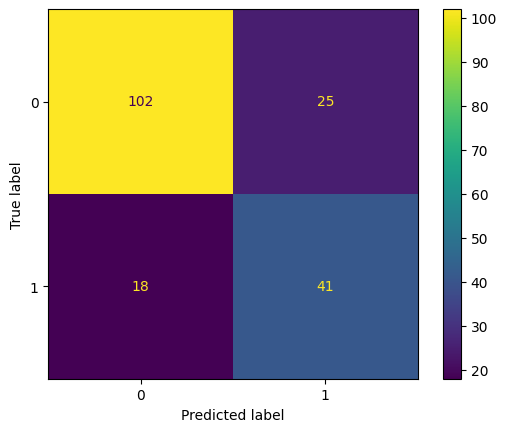

In [198]:
# TODO: 42 Write code to display a confusion matrix by filling the question marks

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# TODO: 43 Interpret the confusion matrix in your own words
# More number of false values are not at all predicted


# Part 4: Save the model as json file, load & use it to do prediction

This is optional and will be used to accumulate bonus points as a buffer for the semester lab exam if there is any shortfall

In [200]:
import os

os.getcwd()
import json

model_params = {}
model_params["best parameters"] = fitted_model.best_params_ 

json_text = json.dumps(model_params, indent=4)

model_filename = "grid_search_best_params.json"
with open(model_filename, "w") as file:
    file.write(json_text)

In [201]:
with open(model_filename, 'r') as f: 
  data = json.load(f)

data

{'best parameters': {'knn_classify__metric': 'euclidean',
  'knn_classify__n_neighbors': 6,
  'knn_classify__weights': 'distance'}}